In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../src/')
from neuralnetwork import *
from analysis import *

%matplotlib notebook
#%matplotlib inline
%load_ext autoreload
%autoreload 2

# Fisher Information Matrix

## Random Initialization

### Quantum Neural Network

In [2]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=1, n_features=1, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=100000)
layer2 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=100000)
layer3 = QLayer(n_qubits=5, n_features=5, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=100000)


layers = [layer1, layer2, layer3]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [3]:
x = np.random.uniform(0, 1, 100).reshape(-1,1)
y = np.exp(-10*(x-0.5)**2) - 0.05

In [4]:
fim1, fr1 = fisher_information_matrix(network, x, y)

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
eigen1 = np.linalg.eig(fim1)[0]
eigen1[::-1].sort()
print(len(eigen1))
print(eigen1)
print(fr1)

35
[2.66135150e-02 5.96159667e-03 3.66844047e-03 2.65192847e-03
 9.14174580e-04 4.37017783e-04 2.76237748e-04 2.13805247e-04
 1.20047995e-04 3.53706821e-05 2.31205643e-05 1.36775128e-05
 3.88076504e-06 1.71937622e-06 1.41105045e-06 8.95381471e-07
 7.15736970e-07 5.04764887e-07 3.56764515e-07 2.70186016e-07
 1.90649329e-07 1.54352775e-07 1.38458555e-07 1.14545462e-07
 9.51847836e-08 8.21993057e-08 4.90440093e-08 4.23126012e-08
 4.04933713e-08 3.16187126e-08 2.63038035e-08 1.14599120e-08
 6.19895236e-09 9.16662162e-10 2.80299261e-10]
[[0.0920768]]


### Classic Neural Network

In [12]:
np.random.seed(42)

layer1 = Dense(n_features=1, n_targets=4, scale = 1, activation = Sigmoid())
layer2 = Dense(n_features=4, n_targets=4, scale = 1, activation = Sigmoid())
layer3 = Dense(n_features=4, n_targets=1, scale = 1, activation = Identity())
layers =[layer1, layer2, layer3]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [13]:
x = np.random.uniform(0, 1, 100).reshape(-1,1)
y = np.exp(-10*(x-0.5)**2) - 0.05

In [8]:
fim2, fr2 = fisher_information_matrix(network, x, y)

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
eigen2 = np.linalg.eig(fim2)[0]
eigen2[::-1].sort()
print(len(eigen2))
print(eigen2)
print(fr2)

33
[ 7.71737932e+00+0.00000000e+00j  1.17789306e-03+0.00000000e+00j
  6.39986812e-08+0.00000000e+00j  1.38438880e-09+0.00000000e+00j
  3.73967432e-14+0.00000000e+00j  6.03363225e-16+0.00000000e+00j
  4.05655257e-16+0.00000000e+00j  1.73976659e-16+0.00000000e+00j
  8.01728532e-17+0.00000000e+00j  4.45242123e-17+0.00000000e+00j
  2.21762756e-17+1.17917706e-18j  2.21762756e-17-1.17917706e-18j
  1.07580688e-17+0.00000000e+00j  9.16774653e-18+0.00000000e+00j
  6.30393014e-18+0.00000000e+00j  3.37335095e-18+0.00000000e+00j
  1.69223598e-18+0.00000000e+00j  7.84793981e-19+0.00000000e+00j
  4.34490669e-19+0.00000000e+00j -2.31973530e-19+0.00000000e+00j
 -9.71233264e-19+0.00000000e+00j -1.29959510e-18+0.00000000e+00j
 -2.27393403e-18+0.00000000e+00j -4.58563834e-18+0.00000000e+00j
 -5.21985837e-18+0.00000000e+00j -5.53213625e-18+0.00000000e+00j
 -9.32138298e-18+0.00000000e+00j -2.59158373e-17+0.00000000e+00j
 -2.99475013e-17+0.00000000e+00j -9.67423313e-17+0.00000000e+00j
 -1.37735000e-16+0.000

### Comparison

<IPython.core.display.Javascript object>


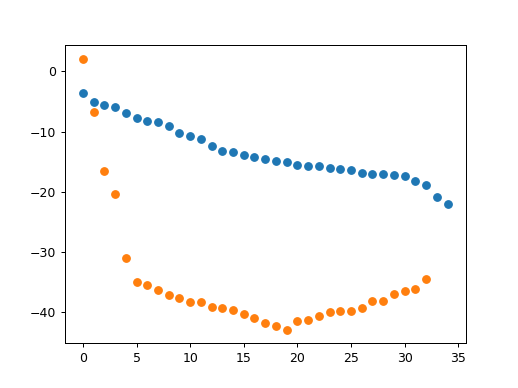

/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [16]:
plt.plot(np.log(eigen1), "o")
plt.plot(np.log(eigen2), "o")
plt.show()

## Global minimum

### Quantum Neural Network

In [4]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=1, n_features=1, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=100000)
layer2 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=100000)
layer3 = QLayer(n_qubits=5, n_features=5, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=100000)


layers = [layer1, layer2, layer3]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [5]:
x = np.random.uniform(0, 1, 100).reshape(-1,1)
y = network.predict(x)# + np.random.normal(0, 0.1, 100).reshape(-1,1)

In [6]:
fim3, fr3 = fisher_information_matrix(network, x, y)

  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
eigen = np.linalg.eig(fim3)[0]
eigen[::-1].sort()
print(len(eigen))
print(eigen)
print(fr3)

35
[1.53663284e-01 4.85132565e-02 2.33499420e-02 1.65420139e-02
 9.69863423e-03 6.53570014e-03 3.87731689e-03 2.08150178e-03
 9.86928787e-04 6.31517239e-04 5.06236568e-04 2.95120785e-04
 1.36576950e-04 3.47519802e-05 1.71332296e-05 1.32119959e-05
 6.24137560e-06 4.74082604e-06 2.71572504e-06 2.53471278e-06
 2.16338069e-06 1.39029059e-06 9.46391643e-07 8.34453025e-07
 7.34427738e-07 5.35844953e-07 3.34931526e-07 3.10989236e-07
 2.53149812e-07 2.45568530e-07 1.80074466e-07 1.14280159e-07
 4.86705189e-08 1.26550019e-08 5.47973612e-09]
[[0.50936122]]


### Classic Neural Network

In [8]:
np.random.seed(40)

layer1 = Dense(n_features=1, n_targets=4, scale = 1, activation = Sigmoid())
layer2 = Dense(n_features=4, n_targets=4, scale = 1, activation = Sigmoid())
layer3 = Dense(n_features=4, n_targets=1, scale = 1, activation = Identity())
layers =[layer1, layer2, layer3]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [9]:
x = np.random.uniform(0, 1, 100).reshape(-1,1)
y = network.predict(x) + np.random.normal(0, 0.1, 100).reshape(-1,1)

In [10]:
fim4, fr4 = fisher_information_matrix(network, x, y)

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
eigen = np.linalg.eig(fim4)[0]
eigen[::-1].sort()
print(len(eigen))
print(eigen)
print(fr4)

33
[ 2.43616964e+00  1.21259022e-04  7.17385956e-09  1.91080419e-11
  2.30016614e-15  3.65200934e-16  1.21672498e-16  7.74385069e-17
  6.49449086e-18  4.00465161e-18  1.65214655e-18  1.30681642e-18
  9.57442797e-19  7.88353418e-19  5.28678579e-19  4.43173884e-19
  2.10704312e-19  3.54950465e-20  1.07914619e-21 -2.53440912e-20
 -1.06687322e-19 -2.19415284e-19 -2.68455464e-19 -6.02572620e-19
 -9.87616213e-19 -1.46537067e-18 -2.01048250e-18 -2.90125716e-18
 -3.88596755e-18 -4.81424418e-18 -8.33535682e-18 -4.34447299e-17
 -3.44573025e-16]
[[0.6646115]]
